More information about the gradient vector: James Stewart, Multivariable Calculus

Author Code Source: http://neuralnetworksanddeeplearning.com/chap1.html

In [1]:
from IPython.display import Image

## Learning with stochastic Gradient descent and the quadratic cost function
In this section I describe the gradient descent rules with Stochastic Gradient Descend and adapt the Authors source code for a Classification task with the MNIST dataset. The code will use Stochastic Gradient Descend as Optimizer with Mean Squared Error loss function and sigmoid activation functions for the hidden layers. A numpy version of softmax is used to classify in the output.

### The direction of the gradient $\nabla C$ and the quadratic cost function in determining the gradient descent rules

Consider a surface whose height above sea level at point $(x,y)$ is $H(x,y)$. The gradient of H ($\nabla H(x,y)$) at a point is a plane vector `pointing in the direction of the maximum increase or grade at that point`. The steepness of the slope at that point is given by the magnitude of the gradient vector.

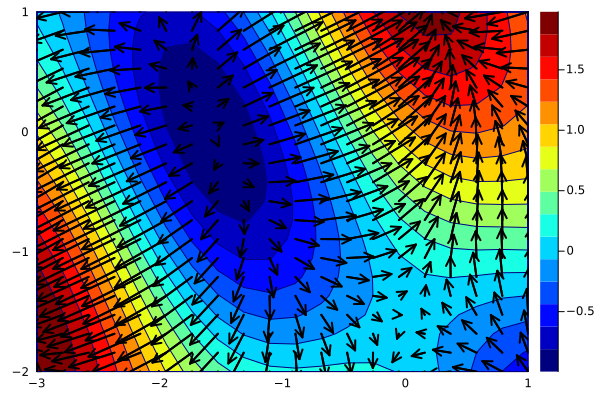

In [11]:
Image("images/steepest_ascent.png")

In the image above the direction of the simplified plane vector $\nabla H(x,y)$ follow the steepest ascent of $H(x,y)$. The direction of the vectors goes from the blue color, lower $H(x,y)$, to the red colors, highest values of $H(x,y)$

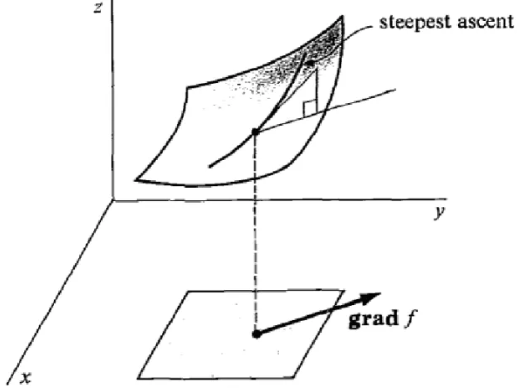

In [12]:
Image("images/plane_gradient.png")

In the Above image the direction of the gradient of the $z = f(x,y)$ function ($\nabla z(x,y)$) in a certain point $(x,y)$ shows the direction of the steepest ascent of $z = f(x,y)$.

The neural network will learn or be trained when the desired output vector $y(x)$ and the vector output of the network $a^{L}$ be closer as it can for each training example $x$, that is $(y(x)$ - $a^{L}) \approx 0 $. That is reached by changing the values of the biases and the weights in the network. In this sense training a neural network is an optimization problem, focused on minimizing a target function associated with the error, changing the parameters of biases and weights. In a simple linear regression the error is squared to avoid negative errors, following this, the error or cost function for a single training example $x$ will be:

 $$
\begin{eqnarray}  
 C_x \equiv \frac{\| y(x) - a^{L}\|^2}{2}  
\end{eqnarray}
$$

And the average total error $C$ then will be the sum of all the errors of the training examples $x$ divided by the number of training examples $n$.

$$
\begin{eqnarray}  
C = \frac{1}{n} \sum_x C_x,
\end{eqnarray}
$$ 

In terms of the biases and the weights the average total error can be expressed as

$$
\begin{eqnarray}  
C(w,b) = \frac{1}{2n} \sum_x \| y(x) - a^{L}\|^2.
\end{eqnarray}
$$
  
Given the "quadratic nature" of the quadratic cost function, there is always a minimum. However, in deep neural networks, the cost function is often a high-dimensional and highly complex surface, especially as it involves numerous inputs, weights, and biases. While a quadratic cost function may seem simple, in practice, the optimization landscape can contain many local minima and saddle points due to the high-dimensionality of the parameters.

In the case of a parameter $p$ (which could be the weights or biases), to minimize the cost function  $C(p)$, we update the parameter by taking steps in the opposite direction of the steepest ascent of the cost function (i.e., $−∇C(p)$, the negative gradient), guiding the optimization toward a minimum of $C(p)$. This process is called gradient descent.

However, it’s important to note that in high-dimensional spaces, there may be local minima, which are points where the cost function is lower than the surrounding area but not necessarily the global minimum. Furthermore, deep networks often contain saddle points—points where the gradient is zero, but the point is neither a local maximum nor a local minimum (the curvature is positive in some directions and negative in others). Saddle points can slow down training because the gradient is small and updates become ineffective.

To control the "speed of descent" and ensure that we take appropriate-sized steps without overshooting the minimum, we define a constant $\eta$, called the learning rate. With this, the update rule for a parameter p is given by:

$$
\begin{eqnarray} 
p \rightarrow p' = p - \eta \nabla C(p)
\end{eqnarray}
$$


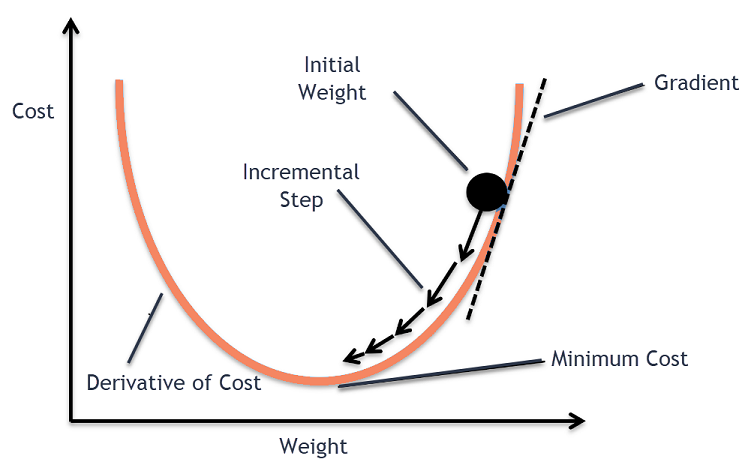

In [13]:
Image("images/gradient_descent.png")

The above image shows the gradient descent for weights to find the minimum of $C(w)$ in terms of a single weight $w$. In each calculation step the new weight $w'$ will be closer and closer to the minimum of the cost function $C(w)$

The learning rate $\eta$ is crucial: if it’s too large, the updates might overshoot the minimum, and if it’s too small, the learning process can be slow and inefficient.

In terms of weights and biases in vector component form the rule of Eq. 4 will be

\begin{eqnarray}
  w_{jk}^{l} & \rightarrow & w_{jk}^{l}' = w_{jk}^{l}-\eta \frac{\partial C}{\partial w_{jk}^{l}} \\
  b^{l} & \rightarrow & b^{l}' = b^{l}-\eta \frac{\partial C}{\partial b^{l}}
\end{eqnarray}

### Stochastic gradient descend
There are a number of challenges in applying the gradient descent rules. One of them is the local minimum problem and the expensive computation requirements for calculation the gradient descent rules. Notice that the average total cost function has the form   $C = \frac{1}{n} \sum_x C_x$, that is, it's an average over costs $C_x \equiv \frac{\|y(x)-a\|^2}{2}$ for individual training examples $x$.
In practice, to compute the gradient $\nabla C$ it's necessary to compute the gradients $\nabla C_x$ separately for each training input $x$, and then average them, $\nabla C = \frac{1}{n}\sum_x \nabla C_x$. Unfortunately, when the number of training inputs is large this can take a long time, and the learning slows down.

An idea called stochastic gradient descent can be used to speed up learning. The idea is to estimate the gradient $\nabla C$ by computing $\nabla C_x$ for a `small sample of randomly chosen training inputs`. By averaging over this small sample it turns out that it's possible to quickly get a good estimate of the true gradient $\nabla C$, and this helps speed up gradient descent, and thus learning.

Stochastic gradient descent works by randomly picking out a small number m of randomly chosen training inputs. Those random training inputs are labeled as $X_1, X_2, \ldots, X_m$ , and refer to them as a `mini-batch`. Provided the sample size $m$ is large enough it's expected that the average value of the $\nabla C_{X_j}$ will be roughly equal to the average over all $\nabla C_x$, that is, 

$$
\begin{eqnarray}
  \frac{\sum_{j=1}^m \nabla C_{X_{j}}}{m} \approx \frac{\sum_x \nabla C_x}{n} = \nabla C,
\end{eqnarray}
$$

where the second sum is over the entire set of training data. Swapping sides:

\begin{eqnarray}
  \nabla C \approx \frac{1}{m} \sum_{j=1}^m \nabla C_{X_{j}},
\end{eqnarray}

confirming that we can estimate the overall gradient by computing gradients just for the randomly chosen mini-batch.

To connect this explicitly to learning in neural networks, replacing Eq. 8 in Eq. 5 and Eq. 6:


\begin{eqnarray} 
  w_{jk}^{l} & \rightarrow & w_{jk}^{l}' = w_{jk}^{l}-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial w_{jk}^{l}}\\
  
  b^{l} & \rightarrow & b^{l}' = b^{l}-\frac{\eta}{m}
  \sum_j \frac{\partial C_{X_j}}{\partial b^{l}},
\end{eqnarray}

Recalling the backpropagation equations  BP3 and BP4 and remembering that for notation purposes $C_x$ was replaced by $C$ $$\frac{\partial C_x}{\partial b^l_j} = \delta^l_j$$  

 $$
 \begin{eqnarray}
 \frac{\partial C_x}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j
 \end{eqnarray}
 $$ 
 
 Replacing in equations 9 and 10 in terms for each training input $x$
 
 \begin{eqnarray}
    $w^l \rightarrow w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T$ \\
    $b^l \rightarrow b^l-\frac{\eta}{m} \sum_x \delta^{x,l}$
 \end{eqnarray}


#### Remembering the backpropagation algorithm:

The backpropagation equations provide us with a way of computing the gradient of the cost function. Let's explicity write this out in the form of an algorithm

1. Input x: Set the corresponding activation $a^1$ for the input layer.
2. Feedforward, (forward pass): For each $l = 2, 3, ..., L$ compute $z^{l} = w^l a^{l-1}+b^l$ and $a^{l} = \sigma(z^{l})$
3. Output error $\delta^L$: Compute the vector $\delta^{L}
  = \nabla_a C \odot \sigma'(z^L)$
4. Backpropagate the error: For each $l = L-1, L-2,
  \ldots, 2$ compute $\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot
  \sigma'(z^{l})$
5. Output: The gradient of the cost function is given by: $\frac{\partial C}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j$ and $\frac{\partial C}{\partial b^l_j} = \delta^l_j$

### Training algorithm
The backpropagation algorithm computes the gradient of the cost function for a single training example, $C = C_x$. In practice, it's common to combine backpropagation with a learning algorithm such as 'stochastic gradient descent', in which we compute the gradient for many training examples. In particular, given  a mini-batch of $m$ training examples, the following algorithm applies a gradient descent learning step based on a 'mini-batch':

1. Input a set of training examples
2. For each training example x: Set the corresponding input activation $a^{x,1}$, and perform the following steps:
   - Feedforward: For each $l = 2, 3, \ldots, L$ compute $z^{x,l} = w^l a^{x,l-1}+b^l$ and $a^{x,l} = \sigma(z^{x,l})$
   - Output error $\delta^{x,L}$: Compute the vector $\delta^{x,L} = \nabla_a C_x \odot \sigma'(z^{x,L})$
   - Backpropagate the error: For each $l = L-1, L-2,
  \ldots, 2$ compute $\delta^{x,l} = ((w^{l+1})^T \delta^{x,l+1})
  \odot \sigma'(z^{x,l})$
3. Gradient descent: For each $l = L, L-1, \ldots, 2$ update the weights according to the rule $w^l \rightarrow
  w^l-\frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T$, and the biases according to the rule $b^l \rightarrow b^l-\frac{\eta}{m}
  \sum_x \delta^{x,l}$

## Program for training a deep neural network with backpropagation and stochastic gradient descent to predict the species of Iris flowers

In [1]:
# auxiliar definitions
import numpy as np
import random
import pickle
import gzip
from matplotlib import pyplot

#### Data exploration
From the source code we now that the dataset was preprocessed into three subsets. 10,000 samples of the total 60,000 were split off to create a validation dataset, while the remaining 50,000 samples were used for the training dataset. Then, a copy of the validation dataset was shuffled to create a test dataset.

In [2]:
# primary loader to explore the dataset
def load_data():
    f = gzip.open('data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)


In [3]:
# primary data loading
training_data, validation_data, test_data = load_data()

In [34]:
# Datatypes, lengths and samples of the subsets
print('type of training_data: ' + str(type(training_data)))
print('length of training_data: ' + str(len(training_data)))

print('type of tuple elements: ' + 'training inputs -> ' + str(type(training_data[0])) + ', ' + 'training results -> ' + str(type(training_data[1])))

print('\nTraining inputs shape: '+str(training_data[0].shape))
print('Training results shape: '+str(training_data[1].shape)+'\n')
print('Validation inputs shape: '+str(validation_data[0].shape))
print('Validation results shape: '+str(validation_data[1].shape)+'\n')
print('Test inputs shape: '+str(validation_data[0].shape))
print('Test results shape: '+str(validation_data[1].shape)+'\n')

print('Training input data sample: ')
print(training_data[0][0])
print('Training result data sample: ')
print(training_data[1][0])
print('\n')
print('Validation result data sample:')
print(validation_data[1][0])
print('\n')
print('Test result data sample: ')
print(test_data[1][0])


type of training_data: <class 'tuple'>
length of training_data: 2
type of tuple elements: training inputs -> <class 'numpy.ndarray'>, training results -> <class 'numpy.ndarray'>

Training inputs shape: (50000, 784)
Training results shape: (50000,)

Validation inputs shape: (10000, 784)
Validation results shape: (10000,)

Test inputs shape: (10000, 784)
Test results shape: (10000,)

Training input data sample: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        

In [9]:
print(training_data)

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8], dtype=int64))


Training desired result: 
5
0
4
1
9
2
1
3
1
Associated training data:


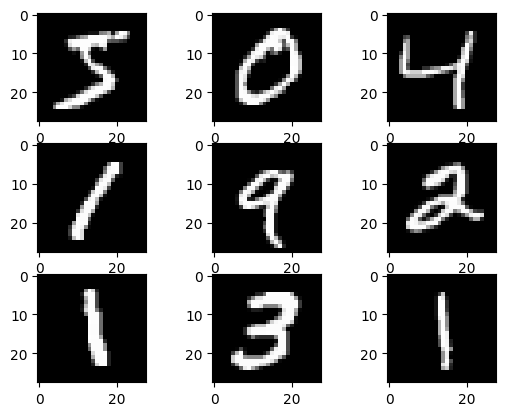

In [35]:
# plot a training desired result and it's associated training data sample
plotting_data = [np.reshape(x, (28,28)) for x in training_data[0]]
print('Training desired result: ')
for i in range (9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(plotting_data[i], cmap=pyplot.get_cmap('gray'))
    print(training_data[1][i])
print('Associated training data:')
pyplot.show()

### Neural network architecture
The goal is to train a neural network that recognizes a digit in a 28 $*$ 28 grayscale pixel image. The dataset was preprocessed to map the intensity of the grays from 0 to 1 of each image. The total pixel information are 784 single points that will be considered as the training input. The training input then must be a 784-dimensional column vector. With 10 different digits the network will be trained to recognize 10 different features. In example when the desired output is the digit 5 the desired output layer will be a column vector of the form output = $[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$ `or with the highest number in the index 5 of the output column vector using a numpy version of softmax in the output`. The training desired output to compare with the neural network output is training_output = $[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]$. To start the train only one hidden layer is considered with a starting number of neurons of 30, but the code is capable of train with any number of layers.

#### Data processing
From the exploration we know that the datatype of the sub-datasets are ndarray, that is a fast datatype. Knowing the requirements of the neural networks architecture the data will be reshaped and grouped again to create 3 lists of data: 
1. 'training_data' that contains 2 lists: 'training_inputs', a list of 50000 784-dimensional column vectors and 'training_results', a list of 'vectorized' 50000 10-dimensional column vectors
2. 'validation_data' and 'test_data' both contains 2 lists, the '_inputs' contains 10000 784-dimensional column vectors and an associated list of 10000 integer digits, va_d[1], te_d[1] respectively

In [45]:
def vectorized_result(j):
    """Transform an integer result to the desired training result, that is a 10-dimensional column vector"""
    e = np.zeros((10,1))
    e[j] = 1.0
    return e

def load_data_wrapper(show_lenghts=False):
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x,(784,1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x,(784,1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    if show_lenghts:
        print(f'Training data length: {len(list(training_inputs))}')
        print(f'Validation data length: {len(validation_inputs)}')
        print(f'Test data length: {len(test_inputs)}')
    return (training_data, validation_data, test_data)

In [46]:
# processed data 
training_data, validation_data, test_data = load_data_wrapper(show_lenghts=True)

Training data length: 50000
Validation data length: 10000
Test data length: 10000


#### Neural Network definition

In [43]:

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

class Network(object):
    """
    (*) operator for numpy arrays or matrices performs element-wise multiplication
    """
    
    def __init__(self, sizes):
        """
        parameters
        sizes: a LIST containing the number of neurons in the respective layers
        np.random.randn generates gaussian distributions with mean 0 and STD of 1
        list[1:] slices elements from index 1 to the end of the list, (exclude the first layer of neurons to have bias, the input layer don't have bias)
        zip() combines multiple iterables in a tuple
        list[:-1] slices all the elements in the list least the last one (the output layer don't have weights connected to a next layer)
        """
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]] # with (y, 1) generates a list of numpy column vectors
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] # generate a list of numpy matrices

    def feedforward(self, a):
        """Return the output of the network if 'a' is input"""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural network outputs the correct result. Note that the neural network's output is assumed to be the index of whichever neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x,y) in test_results)
    
    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives 'partial C_x / partial a' for the output activations"""
        return (output_activations - y)
    
    def backprop(self, x, y):
        """Return a tuple '(nabla_c, nabla_w)' representing the gradient for the cost function C_x. 'nabla_b' and 'nabla_w' are layer-by-layer lists of numpy arrays, similar to 'self.biases' and 'self.weights'. x: contains the input layer column vector, y: contains the associated desired result column vector """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # Step 1. Input x: Set the corresponding activation a^1 for the input layer.
        activation = x # the activation vector of the input layer is the input layer vector itself 
        activations = [x] # list to store all the activations, layer by layer
        
        # Step 2. Feedforward, (forward pass): For each l = 2, 3, ..., L 
        # compute z^{l} = (w^l DOT PRODUCT a^{l-1})+ b^l and a^{l} = sigma(z^{l})
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b 
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        #Step 3. Output error delta^L: Compute the vector delta^L = nabla_a_C * sigma'(z^L)
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        
        # Step 4. Backpropagate the error: For each l = L-1, L-2, ..., L-N compute
        # delta^{l} = ((w^{l+1})^T DOT PRODUCT delta^{l+1}) * sigma'(z^{l})
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        """ Note that the variable 1 in the loop below is used a little differently to the notation in Chapter 2 of the book. Here, l = 1 means the last layer of neurons, l = 2 is the second-last layer of neurons, and so on. It's a renumbering of the scheme in the book, used here to take advantage of the fact that python can use negative indices in lists."""
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
        
    
    def update_mini_batch(self, mini_batch, eta_learning_rate):
        """ Update the network's weights and biases by applying gradient descent using backpropagation to a single mini batch.
         The 'mini_batch' is a list of tuples '(x,y)' """
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w - (eta_learning_rate/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta_learning_rate/len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]
        
    
    def sgd(self, training_data, epochs, mini_batch_size, eta_learning_rate, test_data=None):
        """ Train the neural network using mini-batch Stochastic Gradient Descent. The 'training_data' is a list of tuples (x,y) representing the training inputs and the desired outputs. The other non-optional parameters are self-explanatory. If 'test_data' is provided, the network will be evaluated against the test data after each epoch, and partial progress printed out. This is usefully for taking progress, but slows down the training"""
        
        training_data = list(training_data)
        n = len(training_data)
        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)
            
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k : k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta_learning_rate)
            print("bias sample b[0][5]", self.biases[0][5])
            if test_data:
                print(f'Epoch {j}: {self.evaluate(test_data)} / {n_test}')
            else:
                print(f'Epoch {j} complete')
                

In [44]:
net = Network([784, 30, 10])

W shape:  (30, 784) a-1 shape (784, 1)
W shape:  (10, 30) a-1 shape (30, 1)
(10, 1)
